# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans

sns.set_theme()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [ ]:
data = pd.read_csv('Categorical.csv')
data.describe(include='all')

Remove the duplicate index column from the dataset. 

In [7]:
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [8]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


## Select the features

In [15]:
x = data_mapped.iloc[:, 3:4]
x

,continent
0,0
1,2
2,3
3,0
4,1
...,...
236,5
237,2
238,3
239,3


## Clustering

Use 4 clusters initially.

In [26]:
# kmeans = KMeans(4)
# kmeans = KMeans(3)
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(n_clusters=7)

## Clustering results

In [27]:
data_mapped['cluster'] = kmeans.fit_predict(x)
data_mapped

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,0,4
1,Afghanistan,66.004734,33.835231,2,3
2,Angola,17.537368,-12.293361,3,2
3,Anguilla,-63.064989,18.223959,0,4
4,Albania,20.049834,41.142450,1,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,0
237,Yemen,47.586762,15.909280,2,3
238,South Africa,25.083901,-29.000341,3,2
239,Zambia,27.774759,-13.458242,3,2


## Plot the data

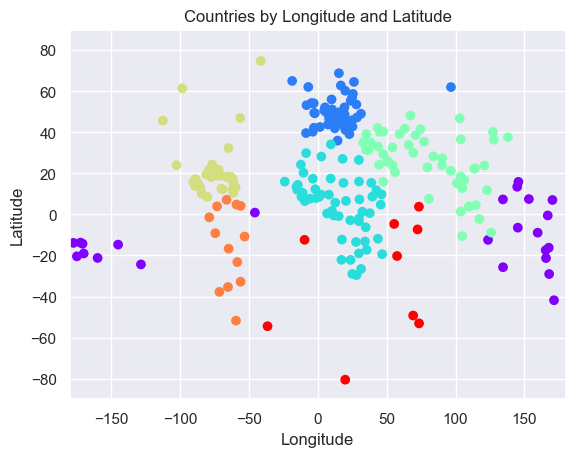

In [28]:

plt.scatter(data['Longitude'], data['Latitude'], c=data_mapped['cluster'], cmap = 'rainbow')
plt.title('Countries by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.